In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Normalizing the pixel values between 0 and 1
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
# Define the ANN Model Architecture

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # Convert the 28x28 Image into a 1D Array
    keras.layers.Dense(128,activation='relu'),  # Hidden Layer with 128 Units
    keras.layers.Dense(10,activation='softmax')  #Output Layer with 10 units
])

In [5]:
# Compile the Model
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2531 - accuracy: 0.9282 - val_loss: 0.1386 - val_accuracy: 0.9574
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1150 - accuracy: 0.9663 - val_loss: 0.1081 - val_accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0784 - accuracy: 0.9765 - val_loss: 0.0805 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0603 - accuracy: 0.9819 - val_loss: 0.0856 - val_accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0810 - val_accuracy: 0.9757


In [7]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
# Print the Confusion Matrix
print('Confusion Matrix')
print(cm)

# Calculate the Accuracy
acc=accuracy_score(y_test,y_pred)

# Printing the Accuracy
print('Accuracy :',acc)

Confusion Matrix
[[ 971    0    0    1    0    0    3    1    3    1]
 [   0 1124    2    1    0    0    1    0    7    0]
 [   8    1  999    4    2    0    4    6    8    0]
 [   0    0    0  999    0    1    0    4    3    3]
 [   3    1    1    0  955    0    5    2    2   13]
 [   2    0    0   14    1  864    4    2    5    0]
 [   6    3    2    1    1    3  940    0    2    0]
 [   2    8   10   10    1    0    0  983    7    7]
 [   4    0    1    5    4    2    1    1  953    3]
 [   3    5    0   10    9    4    0    3    6  969]]
Accuracy : 0.9757


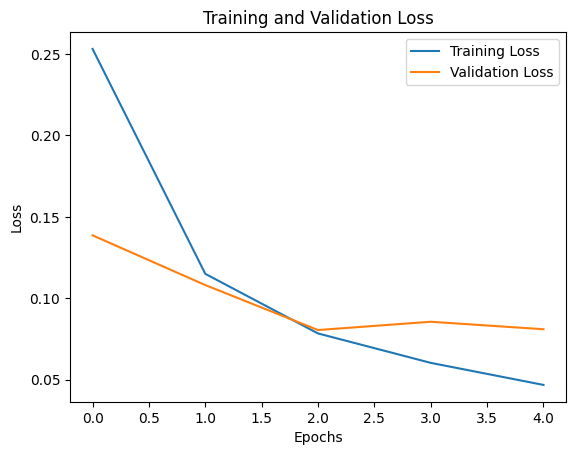

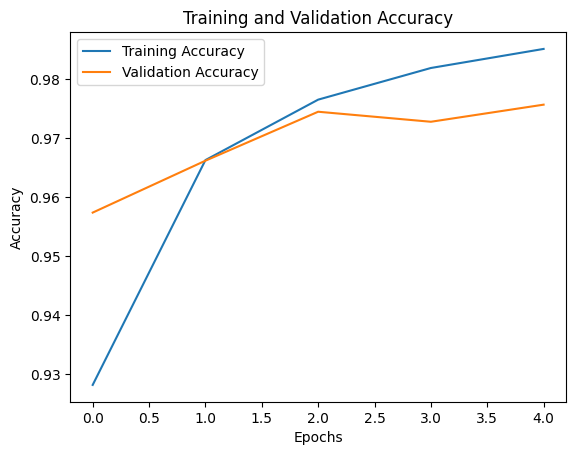

In [9]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'] , label='Training Loss')
plt.plot(history.history['val_loss'] , label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plotting the Training and Validation Loss
plt.plot(history.history['accuracy'] , label='Training Accuracy')
plt.plot(history.history['val_accuracy'] , label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()